
Import Libraries
---



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [9]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv",
                  index_col = 'customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.shape

(7043, 20)

In [11]:
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} unique values : {df[column].unique()}")

gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']
StreamingMovies unique values : ['No' 'Yes' 'No internet service']
Contract unique values : ['Month-to-month' 'O

In [12]:
# Statistic of Data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [14]:
# Change Total Charges from objects to float as ot is numerical values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [15]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [16]:
# Delete "automatic" from PaymentMethod
df["PaymentMethod"] = df["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

In [17]:
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in features_na:
    print(f"{feature}, {round(df[feature].isnull().mean(), 4)} % Missing values")


TotalCharges, 0.0016 % Missing values


In [19]:
# Check  missing values
df[df[features_na[0]].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card,56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [20]:
#Because Tenure is 0 , we can drop it as it won't affect much.
df.dropna(inplace=True)

<ipython-input-23-616e2d480c83>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df["Churn"],palette="Blues")


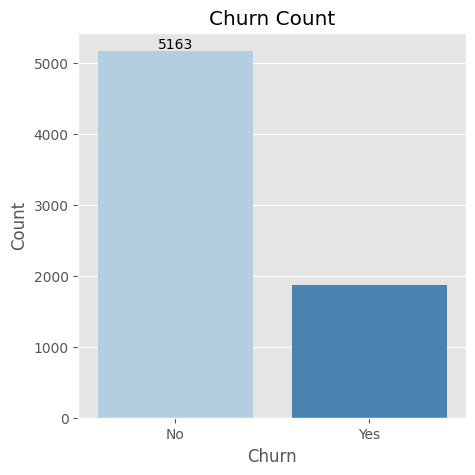

In [23]:
#Apply the ggplot style
plt.style.use("ggplot")
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df["Churn"],palette="Blues")
ax.set_title("Churn Count")
ax.set_xlabel("Churn")
ax.set_ylabel("Count")
ax.bar_label(ax.containers[0])
plt.show()

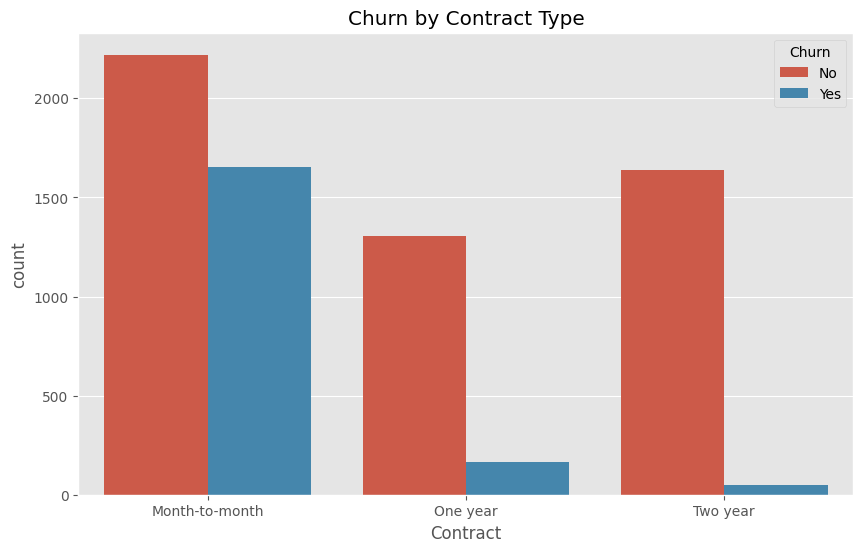

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()


# Corelation matrix


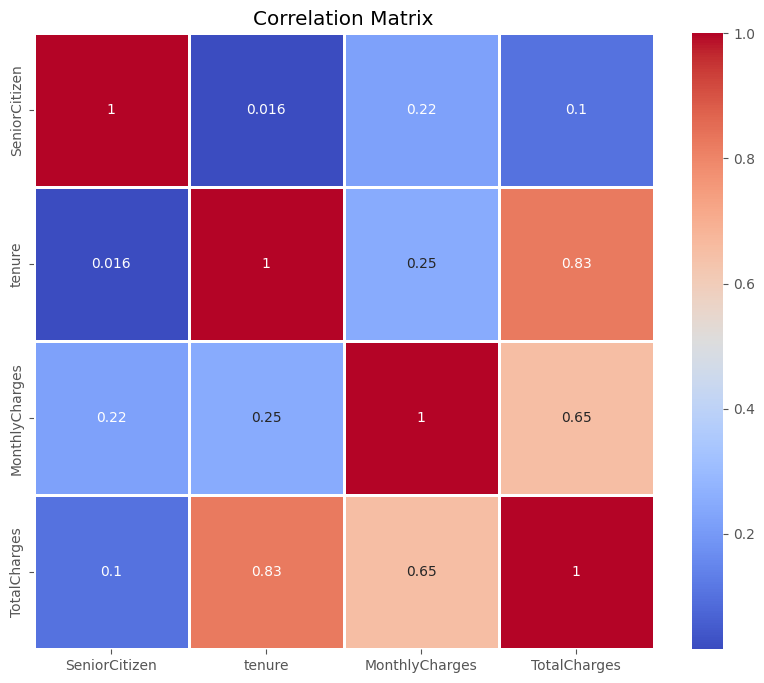

In [27]:
numeric_df = df.select_dtypes(include=[np.number])


plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=1)
plt.title("Correlation Matrix")
plt.show()


In [28]:
df["AverageMonthlyCharges"] = df["TotalCharges"] / df["tenure"]


In [29]:
df = pd.get_dummies(df, drop_first=True)


In [30]:
df.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AverageMonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,29.850000,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
5575-GNVDE,0,34,56.95,1889.50,55.573529,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3668-QPYBK,0,2,53.85,108.15,54.075000,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
7795-CFOCW,0,45,42.30,1840.75,40.905556,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
9237-HQITU,0,2,70.70,151.65,75.825000,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True
9305-CDSKC,0,8,99.65,820.50,102.562500,False,False,False,True,False,...,True,False,True,False,False,True,False,True,False,True
1452-KIOVK,0,22,89.10,1949.40,88.609091,True,False,True,True,False,...,True,False,False,False,False,True,True,False,False,False
6713-OKOMC,0,10,29.75,301.90,30.190000,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
7892-POOKP,0,28,104.80,3046.05,108.787500,False,True,False,True,False,...,True,False,True,False,False,True,False,True,False,True


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeniorCitizen                         7032 non-null   int64  
 1   tenure                                7032 non-null   int64  
 2   MonthlyCharges                        7032 non-null   float64
 3   TotalCharges                          7032 non-null   float64
 4   AverageMonthlyCharges                 7032 non-null   float64
 5   gender_Male                           7032 non-null   bool   
 6   Partner_Yes                           7032 non-null   bool   
 7   Dependents_Yes                        7032 non-null   bool   
 8   PhoneService_Yes                      7032 non-null   bool   
 9   MultipleLines_No phone service        7032 non-null   bool   
 10  MultipleLines_Yes                     7032 non-null   bool   
 11  Interne

In [35]:
import math

In [39]:
# prompt: rescale ["tenure","MonthlyCharges","TotalCharges"] coloums  using Minmaxscaler on dataframe

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Rescale the selected columns
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Print the updated DataFrame
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AverageMonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0.000000,0.115423,0.001275,29.850000,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
5575-GNVDE,0,0.464789,0.385075,0.215867,55.573529,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3668-QPYBK,0,0.014085,0.354229,0.010310,54.075000,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
7795-CFOCW,0,0.619718,0.239303,0.210241,40.905556,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
9237-HQITU,0,0.014085,0.521891,0.015330,75.825000,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeniorCitizen                         7032 non-null   int64  
 1   tenure                                7032 non-null   float64
 2   MonthlyCharges                        7032 non-null   float64
 3   TotalCharges                          7032 non-null   float64
 4   AverageMonthlyCharges                 7032 non-null   float64
 5   gender_Male                           7032 non-null   bool   
 6   Partner_Yes                           7032 non-null   bool   
 7   Dependents_Yes                        7032 non-null   bool   
 8   PhoneService_Yes                      7032 non-null   bool   
 9   MultipleLines_No phone service        7032 non-null   bool   
 10  MultipleLines_Yes                     7032 non-null   bool   
 11  Interne

In [44]:
X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Selection
We use three models for churn classification, model that we use is:



Logistic Regression —  linear model


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initialize and fit the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict on the test set
y_pred_log = log_model.predict(X_test)
y_pred_prob_log = log_model.predict_proba(X_test)[:, 1]



K-Nearest Neighbors — quick, easy, and instance-based


In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]



Neural Network — More complicated like neurons in the human brain.

In [49]:
from sklearn.neural_network import MLPClassifier

# Initialize and fit the neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
nn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test)
y_pred_prob_nn = nn_model.predict_proba(X_test)[:, 1]


# Confusion Matrix

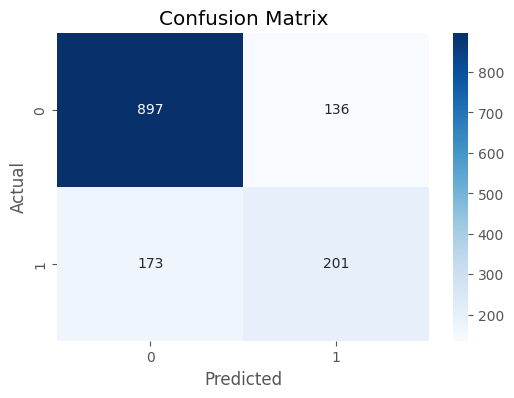

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_1 = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Metrices

In [60]:
from sklearn.metrics import classification_report

# Logistic Regression Report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [57]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       False       0.82      0.82      0.82      1033
        True       0.49      0.49      0.49       374

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407



In [59]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

       False       0.84      0.87      0.85      1033
        True       0.60      0.54      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



# Hyper Tuning
Choosing Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


In [62]:
# Define the model
log_reg = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs'],  # Solvers
    'penalty': ['l2', 'none']  # Regularization penalty
}


In [63]:
# Set up GridSearchCV
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='f1', verbose=1)
grid_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']},
             scoring='f1', verbose=1)

In [64]:
# Best parameters and score
print("Best parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best F1 Score:", grid_log_reg.best_score_)

# Predictions on the test set
y_pred = grid_log_reg.predict(X_test)

# Evaluate the model
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best F1 Score: 0.6091161090911794
Accuracy on test set: 0.7853589196872779
              precision    recall  f1-score   support

       False       0.83      0.88      0.86      1033
        True       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



# Plotting

In [65]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [66]:

y_probs = grid_log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)


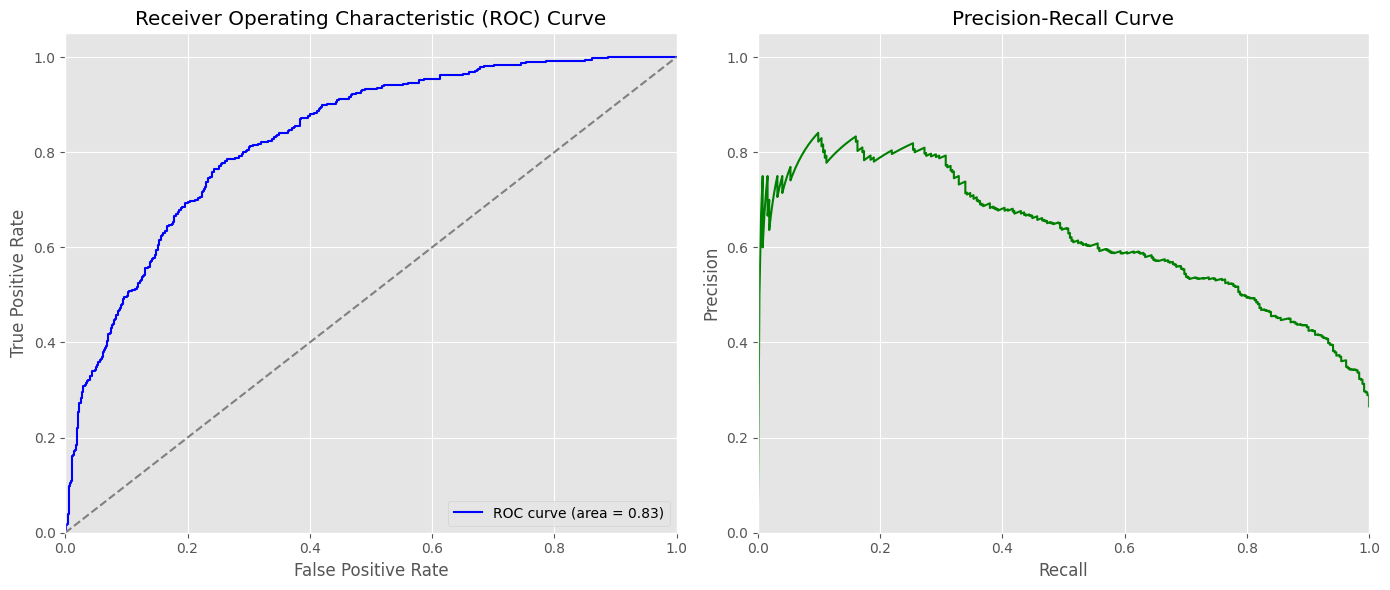

In [67]:
# Set up the figure
plt.figure(figsize=(14, 6))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Show the plots
plt.tight_layout()
plt.show()
